# 13 가설검정

## 두 표본 가설검정
* 단일표본의 비교문제는 하나의 모집단에서 추출된 하나의 표본에 대해 검정
* 그에 비해 두 표본 비교문제는 독립적(서로 관련없음)인 두 모집단으로 부터<br> 
  각각 추출된 표본의 경우와 동일한 모집단으로부터 추출된 두 표본의 경우로 나누어 검정을 실시함
  + 남자와 여자간의 소득 차이 비교 (독립표본)
  + 과외를 받기 전과 후의 성적 차이 비교 (짝 표본)
* 보통 2개의 집단간의 차이가 의미 있는지 확인
* 일상에서는 단일 표본문제보다 더 많이 사용됨

## 정규성 검정
* 데이터의 분포가 정규분포를 따르는지 알아보는 것을 의미
* 통계의 다양한 검정법은 데이터의 정규분포를 가정하고 수행됨
* 데이터가 충분히 크다면(보통 30개 이상) 중심극한정리를 적용할 수 있음
* 하지만, 그 이하일 경우 별도의 정규성 검정이 필요할 수 있음
* 독립표본을 이용해서 가설검정을 실시하기 위해서는 반드시 **정규성**, **등분산성**이 만족되어야 함

In [1]:
# 독립표본 x, y에 대해 정규성을 확인하시오
x <- c(175,168,168,190,156,181,182,175,174,179)
y <- c(185,169,173,173,188,186,175,174,179,180)

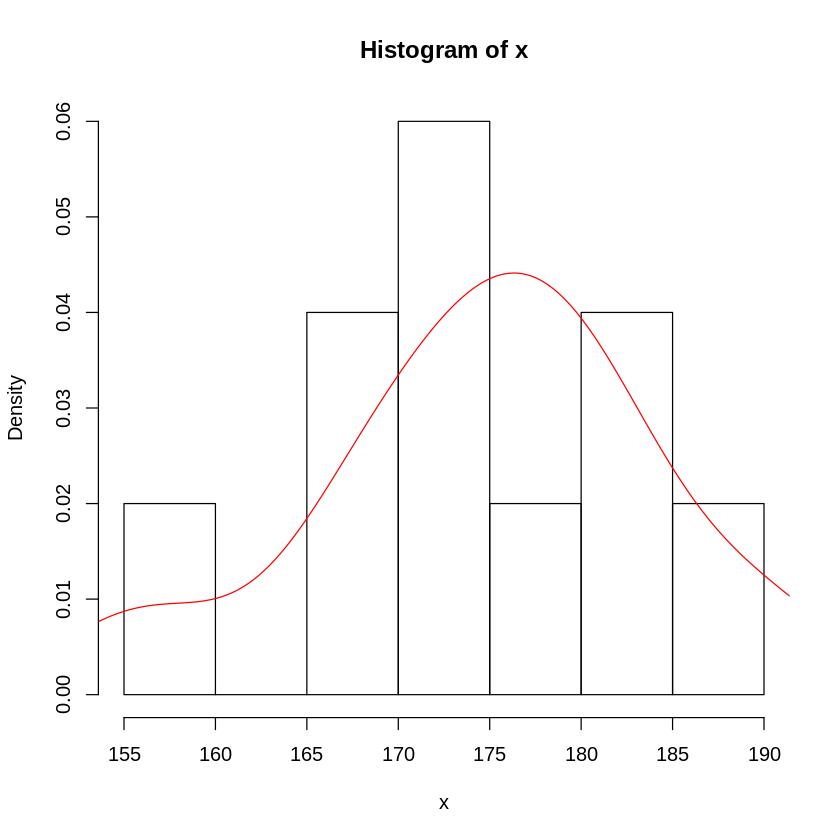

In [2]:
hist(x, probability=T)
lines(density(x), col='red')

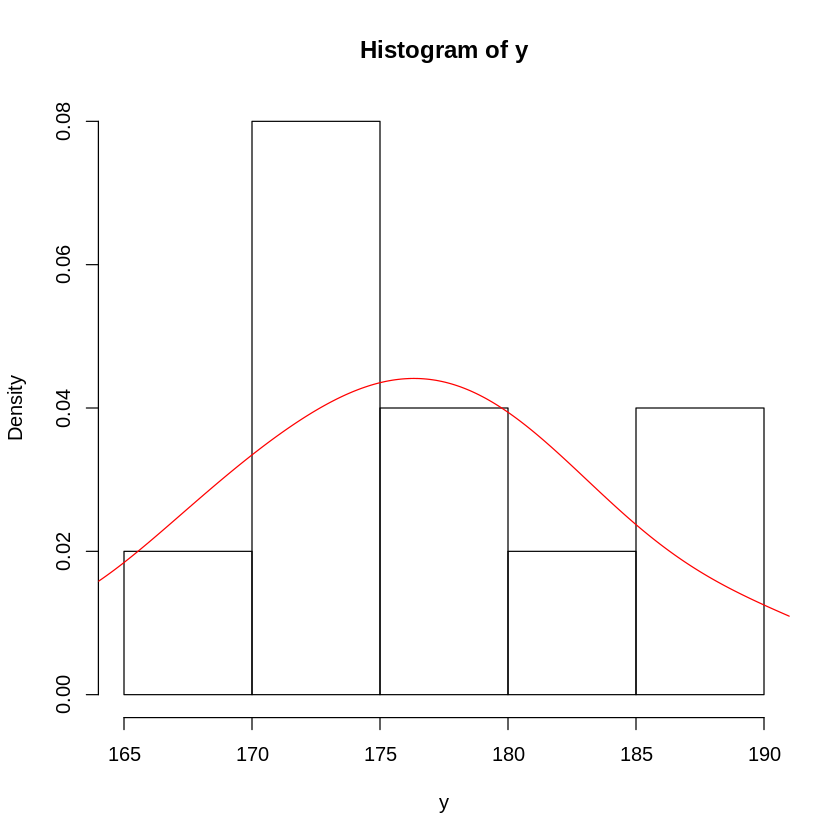

In [3]:
hist(y, probability=T)
lines(density(x), col='red')

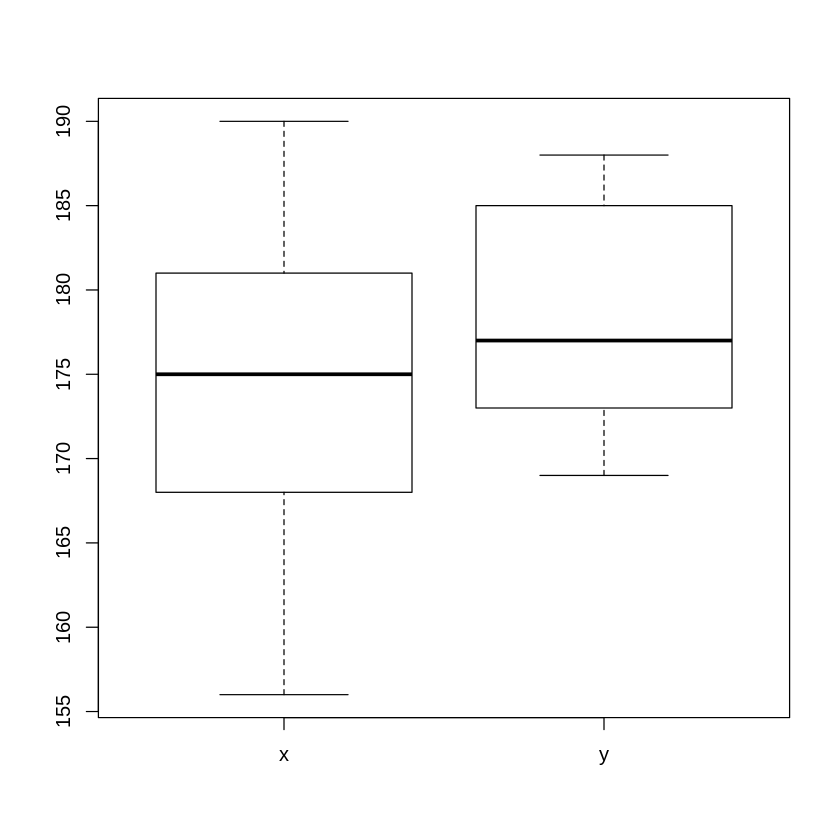

In [4]:
boxplot(x, y, names=c('x','y'))

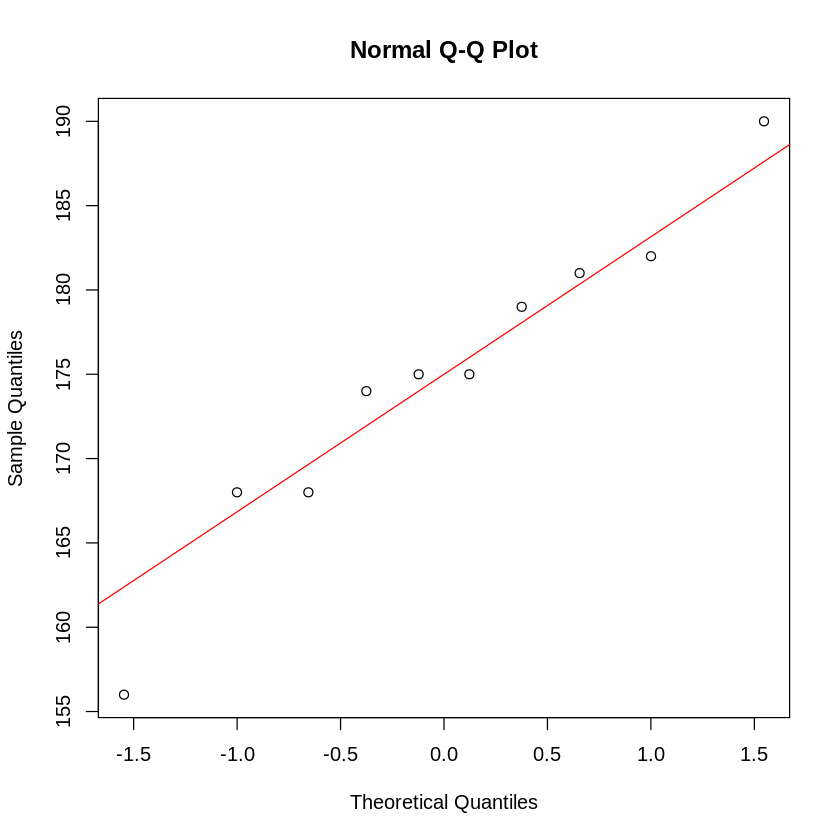

In [5]:
qqnorm(x)
qqline(x, col='red')

In [6]:
shapiro.test(x)
shapiro.test(y)


	Shapiro-Wilk normality test

data:  x
W = 0.96351, p-value = 0.825



	Shapiro-Wilk normality test

data:  y
W = 0.93065, p-value = 0.4543


In [7]:
# 표본간 등분산성을 확인하려면 var.test 함수를 사용함
# var.test(표본1, 표본2)
# 귀무가설 : 두 표본간의 분산의 차이가 없음
# 대립가설 : 두 표본간의 분산의 차이가 있음

var.test(x, y)


	F test to compare two variances

data:  x and y
F = 2.1028, num df = 9, denom df = 9, p-value = 0.2834
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5223017 8.4657950
sample estimates:
ratio of variances 
          2.102784 


In [8]:
# ex) 잔디 깍기 기계 생산 공장에서 작업시간 단축을 위해 2가지 공정이 제안되었음
# A 공정방식은 5명의 근로자에 의해,
# B 공정방식은 6명의 근로자에 의해 각각 테스트가 진행되었을때,
# 작업시간의 차이가 있는지 검정하시오.
# 유의수준 0.10을 사용한다

# A 공정 : 2 4 9 3 2 (단위: 분)
# B 공정 : 3 7 5 8 4 3

In [9]:
# 독립표본 검정의 경우 표본의 수는 일치하지 않아도 됨
a <- c(2, 4, 9, 3, 2)
b <- c(3, 7, 5, 8, 4, 3)

In [10]:
# 정규성 검사
shapiro.test(a)
shapiro.test(b)


	Shapiro-Wilk normality test

data:  a
W = 0.77559, p-value = 0.0505



	Shapiro-Wilk normality test

data:  b
W = 0.89041, p-value = 0.3204


In [11]:
# 등분산성 검사
var.test(a, b)


	F test to compare two variances

data:  a and b
F = 1.9318, num df = 4, denom df = 5, p-value = 0.4871
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.2614846 18.0904550
sample estimates:
ratio of variances 
          1.931818 


In [12]:
# 독립표본 가설검정
# 서로 다른 두 표본간의 평균의 차이가 유의미한지 판단이 목적
# t.test(표본1, 표본2, 등분산여부, 신뢰범위, 검정유형)
# 등분산여부 기본값은 var.equal=F 임

* 귀무가설 : 작업시간의 차이가 없다 <br>
  대립가설 : 작업시간의 차이가 있다 => 양측검정
* 유의수준 : 0.10
* 자유도 : 독립표본 검정시 (n1 - 1) + (n2 - 1) => 9
* 임계값 : -1.833, 1.833

In [13]:
t.test(a, b, alternative=c('two.sided'))
# => t=-0.64106, pvalue=0.5415
# => 귀무가설 채택 => 공정상의 차이가 없을 확률이 높음


	Welch Two Sample t-test

data:  a and b
t = -0.64106, df = 7.1334, p-value = 0.5415
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.674675  2.674675
sample estimates:
mean of x mean of y 
        4         5 


In [14]:
t.test(a, b, alternative=c('two.sided'), var.equal=T)
# => t=-0.66205, pvalue=0.5245
# => 귀무가설 채택 => 공정상의 차이가 없을 확률이 높음


	Two Sample t-test

data:  a and b
t = -0.66205, df = 9, p-value = 0.5245
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.416892  2.416892
sample estimates:
mean of x mean of y 
        4         5 


In [15]:
# ex) 영업사원과 감사부사원의 하루 출장비에
# 차이가 있는지 검정하시오 (유의수준 0.10)
# sales : 131 135 146 165 136 142
# audits : 130 102 129 143 149 120 139  
# 영업부서가 감사부서보다 출장비가 많다고 할 수 있는가?

* 귀무가설 : 영업부가 감사부의 하루 출장비에 차이가 없다 <br>
  대립가설 : 영업부가 감사부보다 출장비가 많다 = 단측검정
* 유의수준 : 0.10
* 자유도 : 13 - 2 = 11
* 임계값 : 1.363

In [16]:
sales <- c(131, 135, 146, 165, 136, 142)
audits <- c(130, 102, 129, 143, 149, 120, 139) 

In [17]:
# 정규성/등분산성 여부 확인
shapiro.test(sales)   # 0.2111
shapiro.test(audits)  # 0.7183


	Shapiro-Wilk normality test

data:  sales
W = 0.86611, p-value = 0.2111



	Shapiro-Wilk normality test

data:  audits
W = 0.94875, p-value = 0.7183


In [18]:
var.test(sales, audits)   # p-value = 0.5934


	F test to compare two variances

data:  sales and audits
F = 0.60143, num df = 5, denom df = 6, p-value = 0.5934
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.100447 4.196620
sample estimates:
ratio of variances 
         0.6014329 


In [19]:
# 검정 실시
t.test(sales, audits, var.equal=T, alternative=c('greater'))
# t = 1.5368, p-value = 0.0763
# 귀무가설 기각 => 영업부가 감사부보다 출장비가 많을 수도 있다


	Two Sample t-test

data:  sales and audits
t = 1.5368, df = 11, p-value = 0.0763
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.059213       Inf
sample estimates:
mean of x mean of y 
 142.5000  130.2857 


In [20]:
# ex) 모델회사의 두 모델 수입이 다음과 같을때
# kim이라는 모델이 park 이라는 모델의 수입보다
# 크다고 할수 있는지 유의수준 0.05로 검정하시오
# kim : 5, 4.5, 3.4, 3.4, 6, 3.3, 4.5, 4.6, 3.5, 5.2, 4.8, 4.4, 4.6, 3.6, 5.0
# park : 3.1, 3.7, 3.6, 4.0, 3.8, 3.8, 5.9, 4.9, 3.6, 3.6, 2.3, 4.0

* 귀무가설 : kim과 park의 모델 수입에 차이가 없다 <br>
  대립가설 : kim이 park보다 모델 수입이 크다 = 단측검정
* 유의수준 : 0.05 
* 자유도 : 27 - 2 = 25 
* 임계값 : 1.708 

In [21]:
kim <- c(5, 4.5, 3.4, 3.4, 6, 3.3, 4.5, 4.6, 3.5, 5.2, 4.8, 4.4, 4.6, 3.6, 5.0)
park <- c(3.1, 3.7, 3.6, 4.0, 3.8, 3.8, 5.9, 4.9, 3.6, 3.6, 2.3, 4.0)

In [22]:
# 정규성/등분산성 여부 확인
shapiro.test(kim)   # 0.1902
shapiro.test(park)  # 0.1033


	Shapiro-Wilk normality test

data:  kim
W = 0.91964, p-value = 0.1902



	Shapiro-Wilk normality test

data:  park
W = 0.88556, p-value = 0.1033


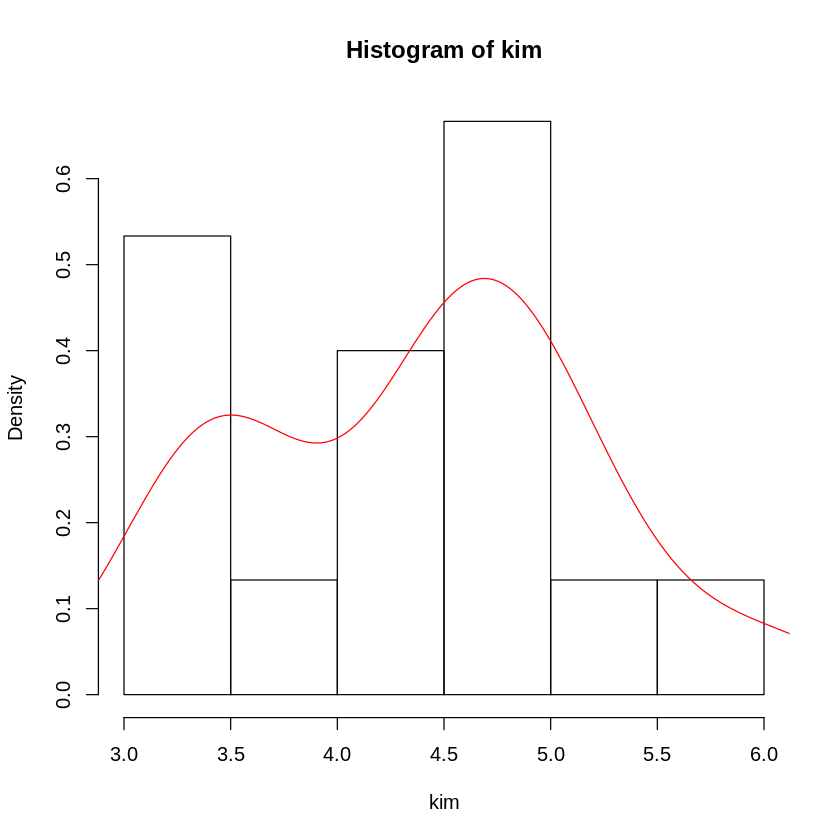

In [23]:
hist(kim, probability=T)
lines(density(kim), col='red')

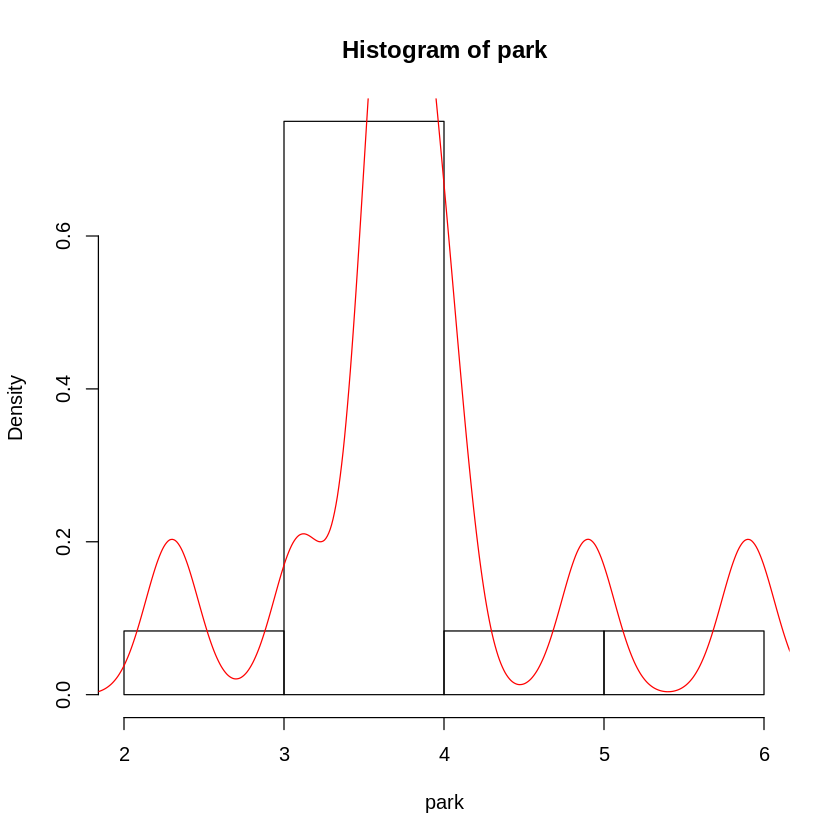

In [24]:
hist(park, probability=T)
lines(density(park), col='red')

In [25]:
var.test(kim, park)


	F test to compare two variances

data:  kim and park
F = 0.8141, num df = 14, denom df = 11, p-value = 0.7055
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2423783 2.5193144
sample estimates:
ratio of variances 
         0.8141029 


In [26]:
# 검정 실시
t.test(kim, park, var.equal=T, alternative=c('greater'))
# t = 1.6367, p-value = 0.05711
# 귀무가설 채택 => kim과 paek의 모델 수입에 차이가 없을 확률이 더 놓음


	Two Sample t-test

data:  kim and park
t = 1.6367, df = 25, p-value = 0.05711
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.02305228         Inf
sample estimates:
mean of x mean of y 
 4.386667  3.858333 
